<a href="https://colab.research.google.com/github/fumiya123/DA_Analisis_Data_Stasiun_Aotizhongxin/blob/main/Analisis_Data_Udara_Stasiun_Aotizhongxin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Air Quality Dataset](https://github.com/marceloreis/HTI/tree/master)
- Nama: Habib Aizul Haq
- Email: habibalhaq53043@gmail.com
- Id Dicoding: kuroba_izzul

## Menentukan Pertanyaan Bisnis

- Berapa pengaruh kadar PM2.5, PM10, SO2, NO2, CO dan O3 satu sama lain.
- Berapa pengaruh kadar TEMP (Temperatur), DEWP (Suhu Titik Beku) satu sama lain.
- Berapa Skor Indek Kualitas Udara dalam 1 minggu.

## Menyaipkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# ambil data dari link github
data_udara = pd.read_csv('https://raw.githubusercontent.com/fumiya123/DA_Analisis_Data_Stasiun_Aotizhongxin/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

### Assessing Data

Ditahap ini kita akan menilai dan melihat keakuratan data dengan mengecek jumlah baris dan kolom, tipe data, data kosong, duplikasi data deskripsi statistik.

1. Kita cek jumlah baris dan kolom dengan kode `data_udara` kode tersebut merupakan variabel yang kita definisikan di proses Gathering Data untuk menampung dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv

In [3]:
data_udara

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


Di pojok kiri bawah dapat kita lihat bahwa terdapat 35064 baris dan 18 kolom dengan rincian setiap kolom sebagai berikut:

- No: nomor kolom
- year: tahun
- month: bulan
- day: hari
- hour: jam
- PM2.5: kadar PM2.5 (partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 µm (mikrometer)) dengan satuan mikrogram per meter kubik (µg/m^3)
- PM10: kadar PM10 (Partikel udara yang berukuran lebih kecil dari 10 mikron (mikrometer)) dengan satuan mikrogram per meter kubik (µg/m^3)
- SO2: kadar SO2 (Sulfur Dioksida) dengan satuan mikrogram per meter kubik (µg/m^3)
- NO2: kadar NO2 (Nitrogen Dioksida) dengan satuan mikrogram per meter kubik (µg/m^3)
- CO: kadar CO (Karbon Monoksida) dengan satuan mikrogram per meter kubik (µg/m^3)
- O3: kadar O3 (Gas Ozon) dengan satuan mikrogram per meter kubik (µg/m^3)
- TEMP: suhu dalam Celsius (C)
- PRES: tekanan udara dalam hecto Pascal (hPa)
- DEWP: suhu titik embun dalam Celsius (C)
- RAIN: curah hujan dalam milimeter (mm)
- wd: arah angin (dalam bahasa inggris N = Utara, S = Selatan, W = Barat, E = Timur)
- WSPM: kecepatan angin dalam meter per detik (m/s)
- station: nama stasiun yang memonitor

2. Selanjutnya kita akan mengecek tipe data yang ada dalam variabel `data_udara` menggunakan method `.info()`

In [4]:
data_udara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari hasil diatas kita bisa mengetahui:
 - 11 kolom bertipe data float64
 - 5 kolom bertipe data int64 dan
 - 2 kolom bertipe data object.

3. Lanjut kita akan mengecek apakah ada data yg kosong atau tidak, menggunakan method `.isna().sum()`

In [5]:
data_udara.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Dari hasil diatas ada 12 kolom yang terdapat data yang kosong. Tenang kita akan membereskannya di proses cleaning data.

4. Lanjut kita akan mengecek apakah data kita memiliki duplicate, dengan method `.duplicate()` dan `.sum()` untuk menjumlah total data yang terdapat duplikasi.

In [6]:
data_udara.duplicated().sum()

0

Dari hasil data kita aman dari duplikasi.

5. Tahap terakhir kita akan melihat parameter statistik dari kolom numerik dengan menggunakan method `.describe()`.

In [7]:
data_udara.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Jika kita lihat pada kolom TEMP terdapat nilai minus, tidak perlu panik tetap tenang, hal ini dapat terjadi karena kolom ini berisi nilai suhu, seperti yang kita ketahui suhu udara bisa turun di bawah 0 derajat, untuk kolom DEWP berisi nilai suhu titik embun dimana terjadi perubahan uap air menjadi air biasanya terjadi jika suhu berada cukup rendah.

### Cleaning Data

Kita akan mengubah terlebih dahulu nama kolom PM2.5 hal ini karena akan mengakibatkan error. Kita akan mengubahnya dengan method `.rename(columns={"OLD_COLUMN_VALUE": "NEW_COLUMN_VALUE"}, inplace=True)` dengan menggunakan tambahan parameter `inplace=True` berfungsi mempertahankan perubahan terhadap data_udara kita.

In [8]:
data_udara.rename(columns={"PM2.5": "PM25"}, inplace=True)

Selanjutnya kita akan mengisi nilai yang kosong tersebut dengan nilai rata-rata dari kolom tersebut dengan menggunakan method `fillna()` untuk mendapatkan nilai rata-rata kita bisa menggunakan method `.mean()`. Namun method `fillna()` hanya dapat digunakan pada tipe data numerik saja, jadi untuk kolom `wd` tidak akan kita ikutkan proses ini.

In [9]:
# Kolom PM25
data_udara['PM25'].fillna(data_udara['PM10'].mean(), inplace=True)

# Kolom PM10
data_udara['PM10'].fillna(data_udara['PM10'].mean(), inplace=True)

# Kolom SO2
data_udara['SO2'].fillna(data_udara['SO2'].mean(), inplace=True)

# Kolom NO2
data_udara['NO2'].fillna(data_udara['NO2'].mean(), inplace=True)

# Kolom CO
data_udara['CO'].fillna(data_udara['CO'].mean(), inplace=True)

# Kolom O3
data_udara['O3'].fillna(data_udara['O3'].mean(), inplace=True)

# Kolom TEMP
data_udara['TEMP'].fillna(data_udara['TEMP'].mean(), inplace=True)

# Kolom PRES
data_udara['PRES'].fillna(data_udara['PRES'].mean(), inplace=True)

# Kolom DEWP
data_udara['DEWP'].fillna(data_udara['DEWP'].mean(), inplace=True)

# Kolom RAIN
data_udara['RAIN'].fillna(data_udara['RAIN'].mean(), inplace=True)

# Kolom WSPM
data_udara['WSPM'].fillna(data_udara['WSPM'].mean(), inplace=True)


In [10]:
data_udara.rename(columns={"PM25": "PM2.5"}, inplace=True)

Jika sudah kita cek lagi untuk memastikan.

In [11]:
data_udara.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

Hasilnya hanya tinggal kolom `wd`, karena `wd` bertipe kategorikal, untuk mengatasi nilai yang kosong di kolom `wd` kita akan menggunakan mthod `value_counts()` yang akan mengidentifikasi nilai yang dominan.

In [12]:
data_udara.wd.value_counts()

NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: wd, dtype: int64

Hasilnya nilai paling dominan adalah `NE` nah nilai inilah yang akan kita masukkan untuk mengisi nilai yang kosong masih menggunakan method `fillna()` kita beri parameter `value="NE"` karena nilai `NE` inilah yang akan kita masukkan ke dalam data yang kosang.

In [13]:
data_udara.fillna(value="NE", inplace=True)

Jika sudah kita lihat lagi apakah masih ada data yang kosong.

In [14]:
data_udara.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dan berdasar hasil diatas semua data kita sudah terbebas dari nilai kosong.

## Exploratory Data Analysis (EDA)

### Explore
Tahap ini kita akan meng-*Explore* `data_udara` berdasarkan pertanyaan yang sudah kita definisikan diatas.

1. Apakah Curah Hujan memengaruhi kadar PM2.5, PM10, SO2, NO2, CO dan O3.

Untuk mengetahuinya kita akan menggunakan method `.corr()` yang akan menghitung nilai korelasi/hubungan sebab akibat antar kolom yang kita inputkan dengan standar semakin mendekati nilai 1 atau -1 maka korelasinya akan semakin besar, begitupun sebaliknya jika mendekati 0 maka korelasinya semakin lemah.

In [15]:

correlation_matrix = data_udara[['RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr().round(2) # .round(2) digunakan untuk menampikan hanya 2 angka di belakang koma
correlation_matrix

,RAIN,PM2.5,PM10,SO2,NO2,CO,O3
RAIN,1.00,-0.01,-0.03,-0.04,-0.04,-0.02,0.02
PM2.5,-0.01,1.00,0.87,0.48,0.68,0.75,-0.16
PM10,-0.03,0.87,1.00,0.46,0.65,0.66,-0.14
SO2,-0.04,0.48,0.46,1.00,0.43,0.53,-0.20
NO2,-0.04,0.68,0.65,0.43,1.00,0.68,-0.49
CO,-0.02,0.75,0.66,0.53,0.68,1.00,-0.32
O3,0.02,-0.16,-0.14,-0.20,-0.49,-0.32,1.00


Disini kita mendapat hasil bahwa curah hujan tidak memengaruhi semua kolom yang akan digunakan untuk menghitung tingkat kualitas udara.

2. Apakah Temperatur memengaruhi Suhu Titik Embun.

In [16]:
correlation_matrix = data_udara[['TEMP', 'DEWP']].corr().round(2)
correlation_matrix

,TEMP,DEWP
TEMP,1.00,0.82
DEWP,0.82,1.00


Dapat kita lihat bahwa Temperatur sangat berkorelasi dengan Suhu Titik Embun.

3. Berapa skor indeks kualitas udara.

Skor indek kualitas udara di china terbagi menjadi 6 level:
- Level 1, 0-50, Sangat Baik
- Level 2, 51-100, Baik
- Level 3, 101-150, Sedikit Tercemar
- Level 4, 151-200, Cukup Tercemar
- Level 5, 201-300, Sangat Tercemar
- Level 6, >300, Tecemar Parah

In [17]:
# melakukan analisis indeks kualitas udara

# bagian Filter dari Tgl 1 Maret 2013 sampai 28 Febuari 2017
tahun = 2013
bulan = 3
hari_dari = 1
hari_sampai = 7

# buat variabel untuk menampung nilai filter
filter_tahun = data_udara["year"]==tahun
filter_bulan = data_udara["month"]==bulan
filter_hari_dari = data_udara["day"]>=hari_dari
filter_hari_sampai = data_udara["day"]<=hari_sampai

# filter data dan pengelompokan data
data_filter = data_udara.where(filter_tahun & filter_bulan & filter_hari_dari & filter_hari_sampai).groupby(['year','month','day'])

# buat variabel untuk menampung nilai 6 kolom yang akan digunakan sebagai dasar perhitungan
# sekalian di hitung rata-ratanya karena dalam 1 hari ada 24 data untuk 9 kolom tersebut
data_skor = data_filter[['PM2.5','PM10','SO2','NO2','CO','O3','year','month','day']].mean().round(2)

# buat variabel Skor untuk menampung nilai rata-rata dari 6 kolom
Skor = data_skor[['PM2.5','PM10','SO2','NO2','CO','O3']].mean(axis=1).round(2)

# masukkan nilai variabel Skor ke dalam Data Frame
data_skor.insert(6,"Skor",Skor)

# membuat kolom Datetime berisi tgl
data_skor['Datetime'] = pd.to_datetime(dict(year=data_skor.year, month=data_skor.month, day=data_skor.day))

# hapus kolom yang sudah tidak dipakai
del(data_skor['year'])
del(data_skor['month'])
del(data_skor['day'])

# kita cek dulu tampilannya
data_skor

PM2.5    PM10     SO2     NO2       CO     O3    Skor  \
year   month day                                                           
2013.0 3.0   1.0    7.12   10.75   11.71   22.58   429.17  63.88   90.87   
             2.0   30.75   42.08   36.62   66.67   824.92  29.75  171.80   
             3.0   76.92  120.54   61.29   81.00  1620.62  19.12  329.92   
             4.0   22.71   44.58   22.64   47.47   644.29  53.75  139.24   
             5.0  148.88  183.79   93.88  132.83  2357.96  68.46  497.63   
             6.0  223.25  265.17  116.24  142.06  3031.46  19.75  632.99   
             7.0  263.38  316.08   97.54  147.75  3632.88  38.83  749.41   

                   Datetime  
year   month day             
2013.0 3.0   1.0 2013-03-01  
             2.0 2013-03-02  
             3.0 2013-03-03  
             4.0 2013-03-04  
             5.0 2013-03-05  
             6.0 2013-03-06  
             7.0 2013-03-07

Jika kita lihat hasil untuk filter 1 April 2013 kadar CO atau Karbon Monoksida sangat tinggi, selanjutnya kita jumlah dan kita ambil rata-rata dari keenam nilai.

Dan dengan skor 254 bisa dikatakan indeks kualitas udara sangat tercemar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa pengaruh kadar PM2.5, PM10, SO2, NO2, CO dan O3 satu sama lain.


Kita akan melihat hasilnya pada visualisais berikut.

Text(0.5, 1.0, 'Correlation Matrix untuk PM2.5, PM10, SO2, NO2, CO dan O3')

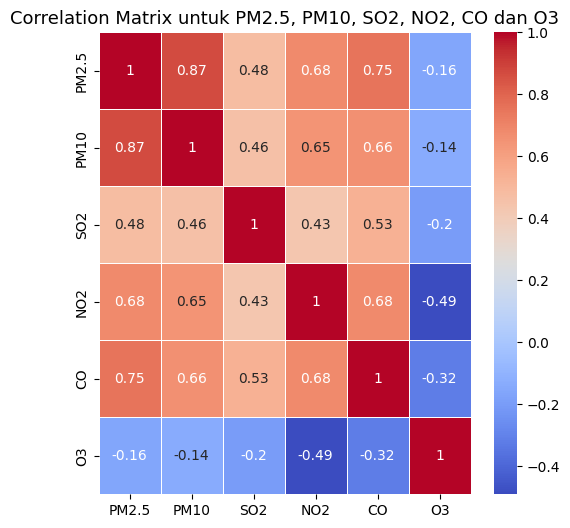

In [18]:
correlation_matrix = data_udara[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr().round(2)

# untuk mengatur ukuran
plt.figure(figsize=(6, 6))

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True, cmap untuk mengatur warna dari biru=dingin dan merah=panas,
# linewidths untuk memberikan spasi antar baris dan kolom
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk PM2.5, PM10, SO2, NO2, CO dan O3", size=13)

Dari hasil diatas nilai korelasi yang paling tinggi ada pada PM2.5 dan PM10, kita akan melihat dalam diagram prot regresi berikut.

<Axes: xlabel='PM2.5', ylabel='PM10'>

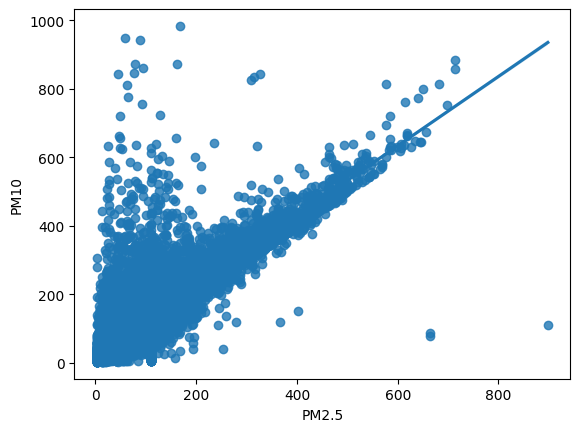

In [19]:
sns.regplot(x="PM2.5", y="PM10", data=data_udara)

Dapat dilihat bahwa nilai PM2.5 dan PM10 tegak lurus, meskiput ada juga data outlier.

Informasi yang kita dapat dari visualisasi diatas yaitu:
- Kadar PM2.5 dan PM10 memeiliki korelasi tertinggi dengan nilai 0.87,
- Kemudian disusul oleh PM2.5 dan CO diposisi kedua dengan nilai 0.75,
- Dan yang ketiga kadar CO2 dan NO2 di posisi ketiga dengan nilai 0.68.

### Pertanyaan 2: Berapa pengaruh kadar TEMP (Temperatur), DEWP (Suhu Titik Beku) satu sama lain.

Text(0.5, 1.0, 'Correlation Matrix untuk TEMP dan DEWP ')

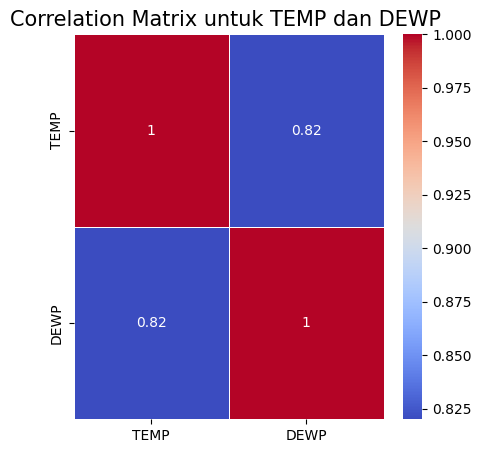

In [20]:
correlation_matrix = data_udara[['TEMP', 'DEWP']].corr().round(2)

# untuk mengatur ukuran
plt.figure(figsize=(5, 5))

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True, cmap untuk mengatur warna dari biru=dingin dan merah=panas,
# linewidths untuk memberikan spasi antar baris dan kolom
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk TEMP dan DEWP ", size=15)

Hasilnya nilai Temperatur sangat berpengaruh terhadap Suhu titik embun dengan nilai 0.82. Untuk lebih mudah kita akan memvisualisasikannya seperti berikut:

<Axes: xlabel='TEMP', ylabel='DEWP'>

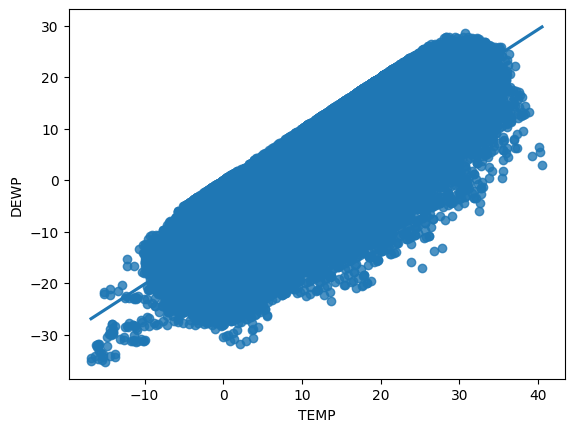

In [21]:
sns.regplot(x="TEMP", y="DEWP", data=data_udara[['TEMP','DEWP']])

Dapat dilihat dalam visualisai nilai TEMP (Temperatur) tegak lurus dengan nilai DEWP (Suhu Titik Embun).

### Pertanyaan 3: Berapa Skor Indek Kualitas Udara dalam 1 minggu

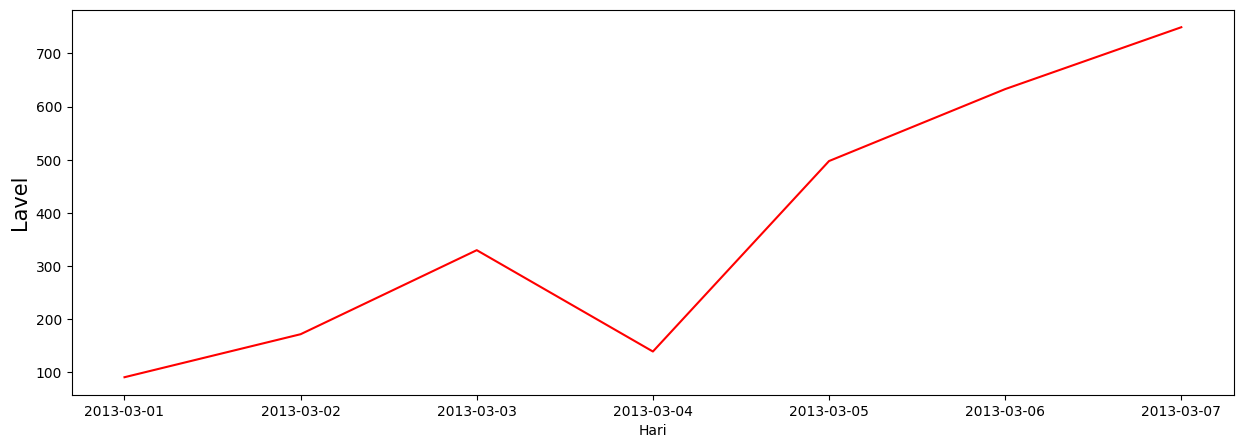

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(data_skor['Datetime'], data_skor['Skor'], color='red')
plt.xlabel('Hari',size=10)
plt.ylabel('Lavel',size=15)
plt.show()

Visualisasi diatas menunjukkan bahwa skor indeks kualitas udara sudah sangat tercemar.

## Conclusion

- Conclution pertanyaan 1
> Kadar PM2.5 dan PM10 memeiliki korelasi tertinggi dengan nilai 0.87,
> Kemudian disusul oleh PM2.5 dan CO diposisi kedua dengan nilai 0.75,
> Dan yang ketiga kadar CO2 dan NO2 di posisi ketiga dengan nilai 0.68.

- conclution pertanyaan 2
> Variabel TEMP dan DEWP sangat berpengaruh satu dengan yang lainnya.

- conclution pertanyaan 3
> Skor indek kualitas udara menunjukkan hasil udara Tercemar Parah.

## Persiapan Untuk Dashboard

Untuk menghasilkan file requirments.txt

In [23]:
!pip install pipreqsnb

In [24]:
!pipreqsnb /content/

pipreqs  /content/
INFO: Successfully saved requirements file in /content/requirements.txt


**Data Udara Group by Tahun, Bulan dan Hari.**

In [25]:
# varaiabel group data berdasar tahun, bulan dan hari
data_group_day = data_udara.groupby(['year','month','day'])

# variabel untuk data rata-rata dalam sehari
data_day = data_group_day[['PM2.5','PM10','SO2','NO2','CO','O3','year','month','day']].mean().round(2)

# menampung nilai skor
Skor = data_day[['PM2.5','PM10','SO2','NO2','CO','O3']].mean(axis=1).round(2)

# masukkan nilai variabel Skor ke dalam Data Frame
data_day.insert(6,"Skor",Skor)

# membuat kolom Datetime berisi tgl
data_day['Datetime'] = pd.to_datetime(dict(year=data_day.year, month=data_day.month, day=data_day.day))

# hapus kolom yang sudah tidak dipakai
del(data_day['year'])
del(data_day['month'])
del(data_day['day'])

**Data Udara.**

In [26]:
# menampung nilai skor
Skor_data_udara = data_udara[['PM2.5','PM10','SO2','NO2','CO','O3']].mean(axis=1).round(2)

# memasukkan nilai Skor_data_udara ke Data Frame
data_udara.insert(11,"Skor", Skor_data_udara)

# membuat kolom Datetime berisi tgl
data_udara['Datetime'] = pd.to_datetime(dict(year=data_udara.year, month=data_udara.month, day=data_udara.day, hour=data_udara.hour), format = '%d/%m/%Y')

**Export Data Frame menjadi file Excel.**

In [27]:
data_udara.to_csv("main_data.csv", index=False)
data_day.to_csv("data_day.csv", index=False)

# **Streamlit**

In [28]:
!pip install streamlit

In [29]:
%%writefile app.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')
from datetime import datetime
from datetime import timedelta

all_df = pd.read_csv('https://raw.githubusercontent.com/fumiya123/DA_Analisis_Data_Stasiun_Aotizhongxin/main/dashboard/main_data.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/fumiya123/DA_Analisis_Data_Stasiun_Aotizhongxin/main/dashboard/data_day.csv')
st.header('Dashboard Index Kualitas Udara Stasiun Aotizhongxin')

#st.write(all_df)

with st.sidebar:
    # Menambahkan logo perusahaan
    st.image("https://i.imgur.com/wkufRHT.png")

    # Mengambil start_date & end_date dari date_input
    tgl_input = st.date_input(
        label='Tanggal',
        value="today")

    tgl_before = tgl_input + timedelta(days=-7)
    tgl_now = pd.to_datetime(tgl_input)
    tgl_se = tgl_now + timedelta(hours=23)
    tgl_after = tgl_input + timedelta(days=7)

# filter data before 7 hari
before_df = day_df[(day_df["Datetime"] >= str(tgl_before)) &
                (day_df["Datetime"] < str(tgl_input))]

# filter data hari ini
today_df = all_df[(all_df["Datetime"] >= str(tgl_now)) &
                (all_df["Datetime"] <= str(tgl_se))]

# filter data after 7 hari
after_df = day_df[(day_df["Datetime"] > str(tgl_input)) &
                (day_df["Datetime"] <= str(tgl_after))]

# Corelasi metrik kadar PM2.5, PM10, SO2, NO2, CO dan O3
correlation_matrix = today_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr().round(2)

# untuk mengatur ukuran
fig, ax = plt.subplots(figsize=(6, 6))

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True, cmap untuk mengatur warna dari biru=dingin dan merah=panas,
# linewidths untuk memberikan spasi antar baris dan kolom
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk PM2.5, PM10, SO2, NO2, CO dan O3", size=13)
st.pyplot(fig)

# plot regresi 1
col1, col2 = st.columns(2)
fig, ax = plt.subplots(figsize=(16, 8))
with col1:
  option1 = st.selectbox("Option X", ("PM2.5", "PM10", "SO2", "NO2", "CO", "O3"), placeholder="Choose an option", key="option1")
with col2:
  option2 = st.selectbox("Option Y", ("PM2.5", "PM10", "SO2", "NO2", "CO", "O3"), placeholder="Choose an option", key="option2")
sns.regplot(x=option1, y=option2, data=today_df)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel(option1, fontsize=20)
ax.set_ylabel(option2, fontsize=20)
st.pyplot(fig)

# Corelasi metrik Temperatur dan Suhu Titik Embun
correlation_matrix = today_df[['TEMP', 'DEWP']].corr().round(2)

# untuk mengatur ukuran
fig, ax = plt.subplots(figsize=(5, 5))

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True, cmap untuk mengatur warna dari biru=dingin dan merah=panas,
# linewidths untuk memberikan spasi antar baris dan kolom
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Temperatur dan Suhu Titik Embun", size=10)
st.pyplot(fig)

# Today Plot
st.subheader("Indeks Kualitas Udara Hari ini")

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
  today_df['hour'], today_df['Skor'], color='red'
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_ylabel('Skor', fontsize=20)
ax.set_xlabel('Jam', fontsize=20)
st.pyplot(fig)

# Before Plot
st.subheader("Indeks Kualitas Udara 7 Hari yang lalu")

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
  before_df['Datetime'], before_df['Skor'], color='red'
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xticks(np.arange(len(before_df['Datetime'])), rotation=45, labels=before_df['Datetime'])
ax.set_ylabel('Skor', fontsize=20)
ax.set_xlabel('Tanggal', fontsize=20)
st.pyplot(fig)

Writing app.py


In [30]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.107.204:8501

npx: installed 22 in 3.369s
your url is: https://busy-shoes-cough.loca.lt
  Stopping...
^C


In [31]:
# untuk menghapus file saat preses development
import os

#os.remove("/content/app.py")
#os.remove("/content/main_data.csv")
#os.remove("/content/data_day.csv")
#os.remove("/content/requirements.txt")